 ## 多项式回归

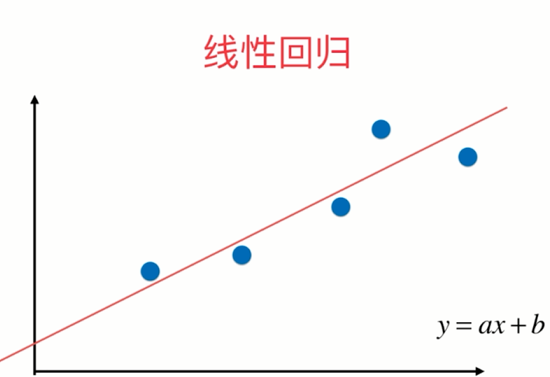

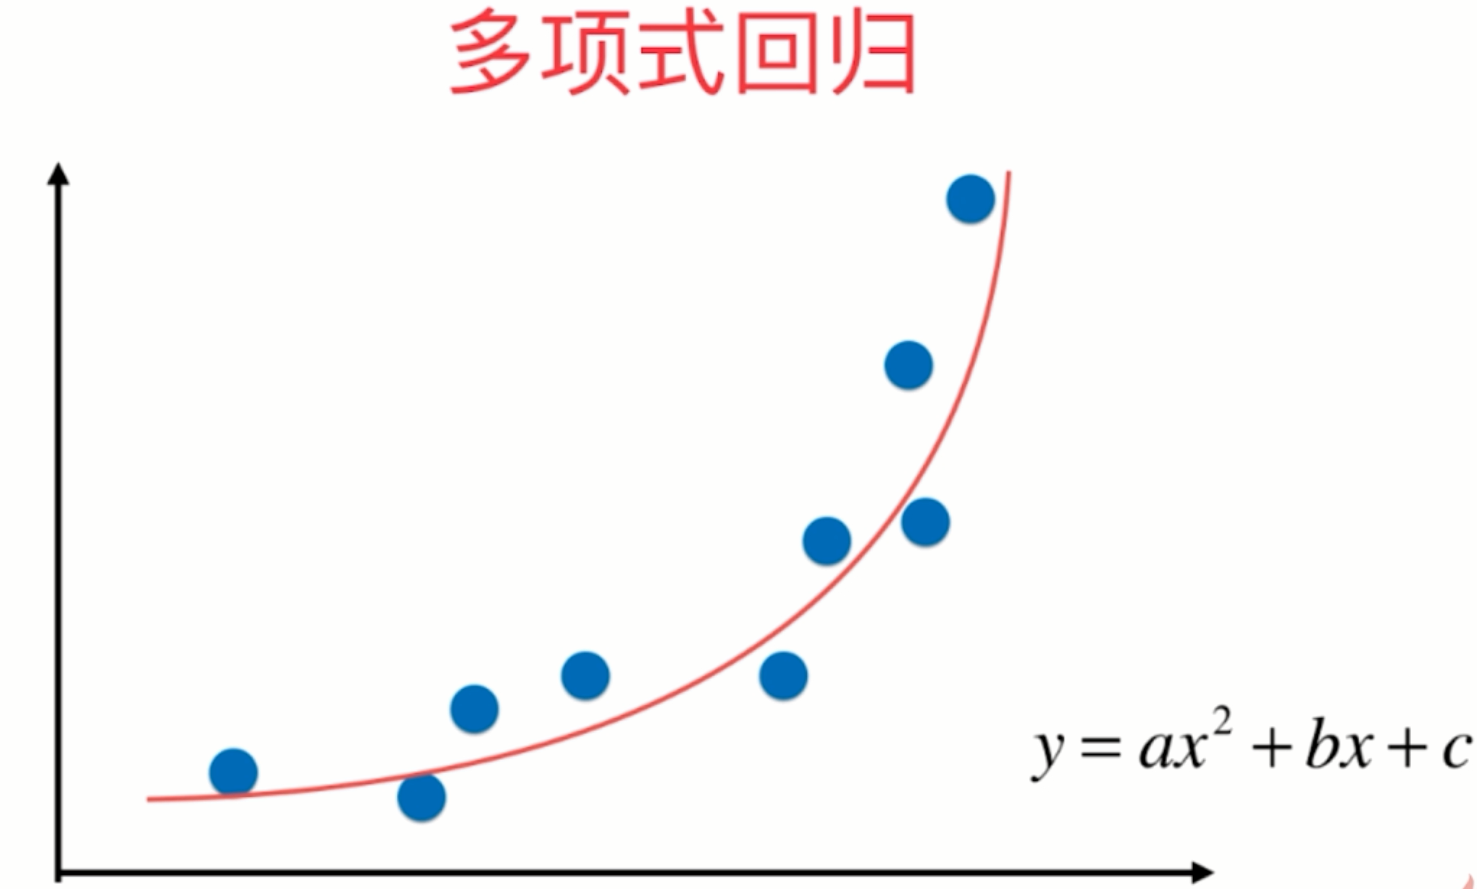

将x平方看做是一个特征，则该多项式就相当于拥有两个特征的线性回归模型

In [1]:
import  numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3 , 3 , size = 100)
X = x.reshape(-1 , 1 )

In [3]:
y = 0.5 * (x**2) + x + 2 + np.random.normal(0 , 1 , size = 100)

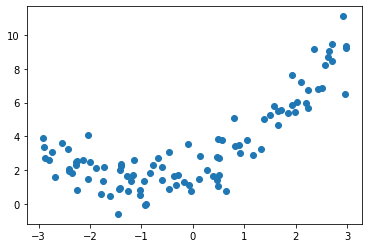

In [4]:
plt.scatter(X,y)
plt.show()

使用线性回归

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pre  =  lin_reg1.predict(X)

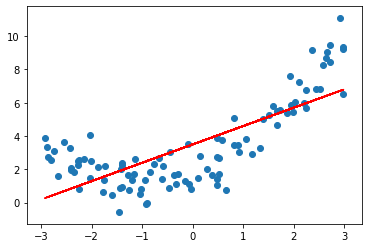

In [8]:
plt.plot(x , y_pre , color='r')
plt.scatter(x,y)
plt.show()

将x平方作为第二个特征值

In [9]:
X2 = np.hstack([X**2 , X])
X2

array([[ 8.06292269e-02, -2.83952860e-01],
       [ 1.12366672e+00,  1.06003147e+00],
       [ 8.35902909e-01,  9.14277260e-01],
       [ 5.59611205e+00,  2.36561029e+00],
       [ 3.54032325e+00, -1.88157467e+00],
       [ 2.63009188e-02, -1.62175580e-01],
       [ 3.74824051e+00,  1.93603732e+00],
       [ 5.91871008e+00, -2.43283992e+00],
       [ 1.05274157e+00, -1.02603195e+00],
       [ 2.04865319e+00, -1.43131170e+00],
       [ 8.86115653e+00,  2.97676948e+00],
       [ 1.99431547e+00, -1.41220235e+00],
       [ 4.59562839e+00, -2.14374168e+00],
       [ 5.16174245e+00, -2.27194684e+00],
       [ 4.40133893e+00,  2.09793683e+00],
       [ 1.95882014e+00, -1.39957856e+00],
       [ 1.35466261e+00, -1.16389974e+00],
       [ 1.05382950e-01, -3.24627402e-01],
       [ 1.46147451e+00, -1.20891460e+00],
       [ 1.38119179e-01, -3.71643888e-01],
       [ 2.77311360e+00,  1.66526683e+00],
       [ 8.25193840e+00, -2.87261874e+00],
       [ 5.93278531e+00,  2.43573096e+00],
       [ 2.

In [10]:
lin_reg2 =  LinearRegression()

In [11]:
lin_reg2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pre2 = lin_reg2.predict(X2)

查看训练后的参数，是否为0.5和1，截距是否为2

In [13]:
lin_reg2.coef_

array([0.51614257, 1.0533484 ])

In [14]:
lin_reg2.intercept_

1.9024517812658586

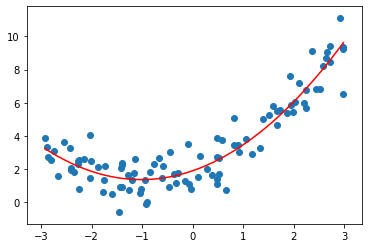

In [15]:
plt.plot(np.sort(x), y_pre2[np.argsort(x)] , color='r')
plt.scatter(x,y)
plt.show()

### sklearn 实现

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
y = 0.7 * (x**3) + 0.5 * (x**2) + x + 3 + np.random.normal(0 , 1 , size  = 100)

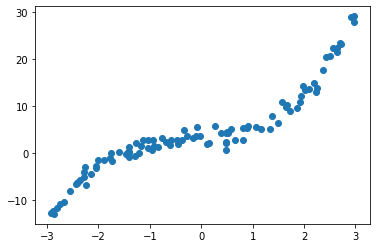

In [18]:
plt.scatter(x,y)
plt.show()

In [19]:
poly = PolynomialFeatures(degree=3)  #3次幂
poly.fit(X)
X3 = poly.transform(X)

In [20]:
X3[:5,:]

array([[ 1.        , -0.28395286,  0.08062923, -0.0228949 ],
       [ 1.        ,  1.06003147,  1.12366672,  1.19112208],
       [ 1.        ,  0.91427726,  0.83590291,  0.76424702],
       [ 1.        ,  2.36561029,  5.59611205, 13.23822025],
       [ 1.        , -1.88157467,  3.54032325, -6.66138255]])

In [21]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

查看参数

In [22]:
lin_reg3.coef_

array([0.        , 0.91722046, 0.49242037, 0.72097501])

In [23]:
lin_reg3.intercept_

3.0620584864586275

In [24]:
y_pre3 = lin_reg3.predict(X3)

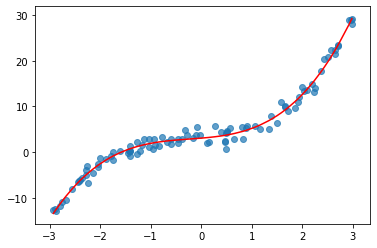

In [25]:
plt.plot(np.sort(x), y_pre3[np.argsort(x)] , color='r')
plt.scatter(x,y,alpha=0.7)
plt.show()

## Pipeline

创建多项式回归

一条龙服务

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([ 
    ("poly" , PolynomialFeatures(degree = 3)),          #多项式特征生成
    ("std_saler" , StandardScaler()),              #数据归一化
    ("lin_reg" , LinearRegression())           #线性回归
])

In [27]:
poly_reg.fit(X3 , y)
y_pre3 = poly_reg.predict(X3)

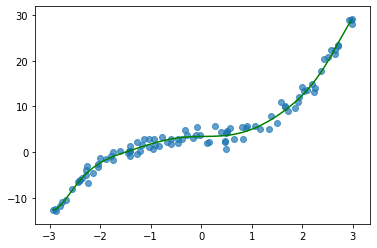

In [28]:
plt.plot(np.sort(x), y_pre3[np.argsort(x)] , color='g')
plt.scatter(x,y,alpha=0.7)
plt.show()

## 过拟合和欠拟合

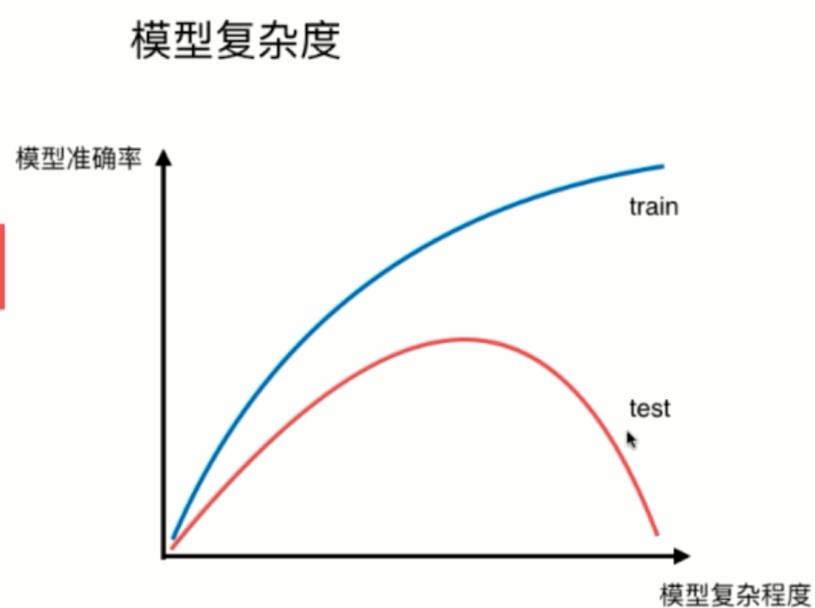

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

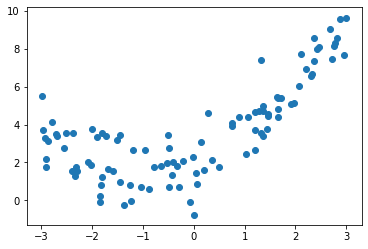

In [31]:
plt.scatter(x, y)
plt.show()

### 使用线性回归

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

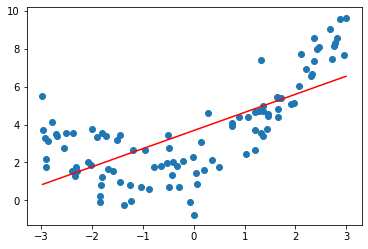

In [33]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [36]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [37]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

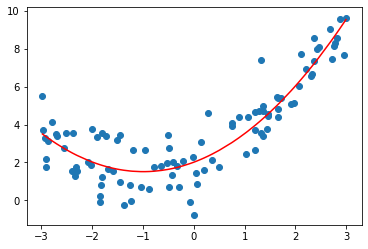

In [38]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [39]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764144

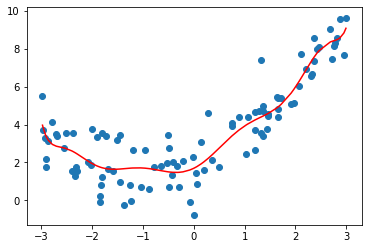

In [40]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [41]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6873776407139158

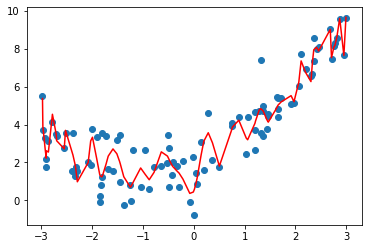

In [42]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [43]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

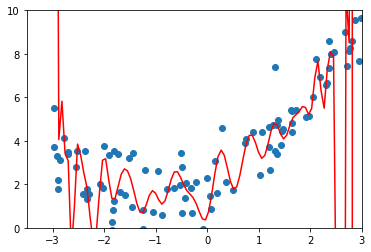

In [44]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3.5, 3, 0, 10])
plt.show()

### train test split的意义

检验模型的泛化能力

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

**欠拟合**

In [46]:
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

**2次拟合**

In [47]:
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

**10次幂拟合**

In [48]:
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150665

**100次幂拟合**

In [49]:
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075780285.35728

## 学习曲线

随着训练样本的增多，算法训练出的模型的表现能力

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

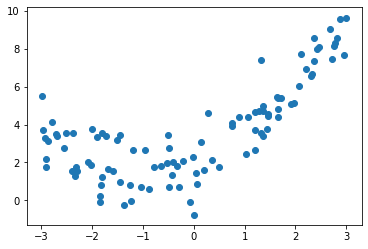

In [52]:
plt.scatter(x, y)
plt.show()

### 学习曲线

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [54]:
X_train.shape

(75, 1)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

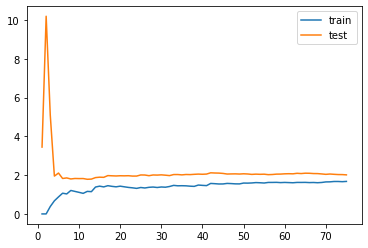

In [56]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

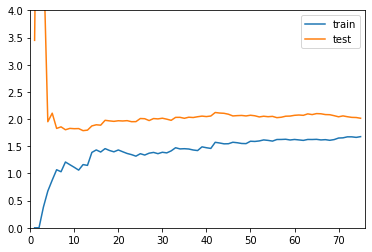

In [57]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

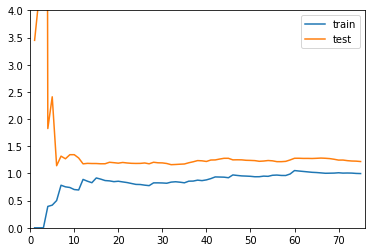

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

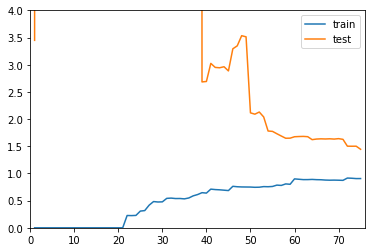

In [59]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

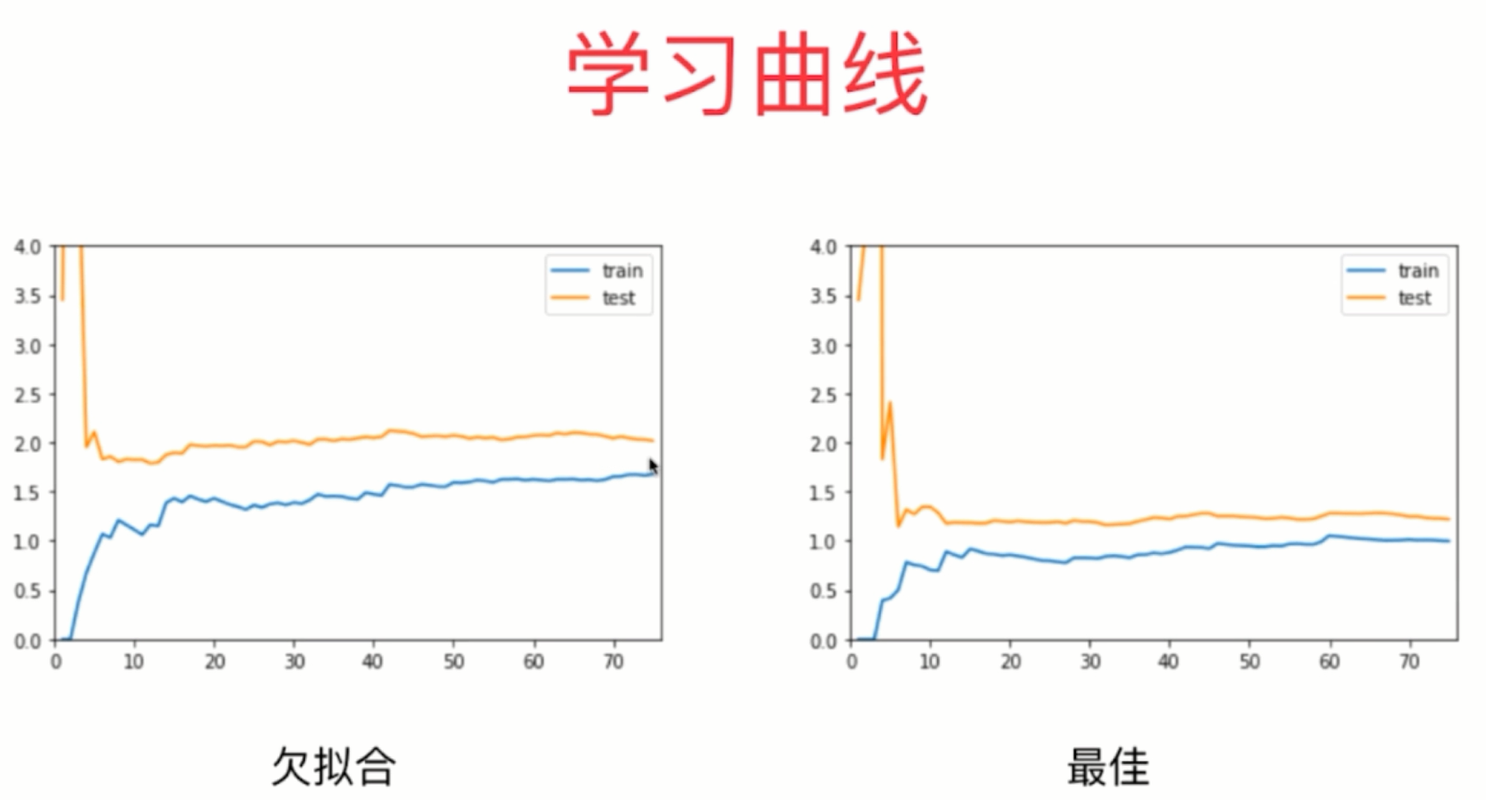

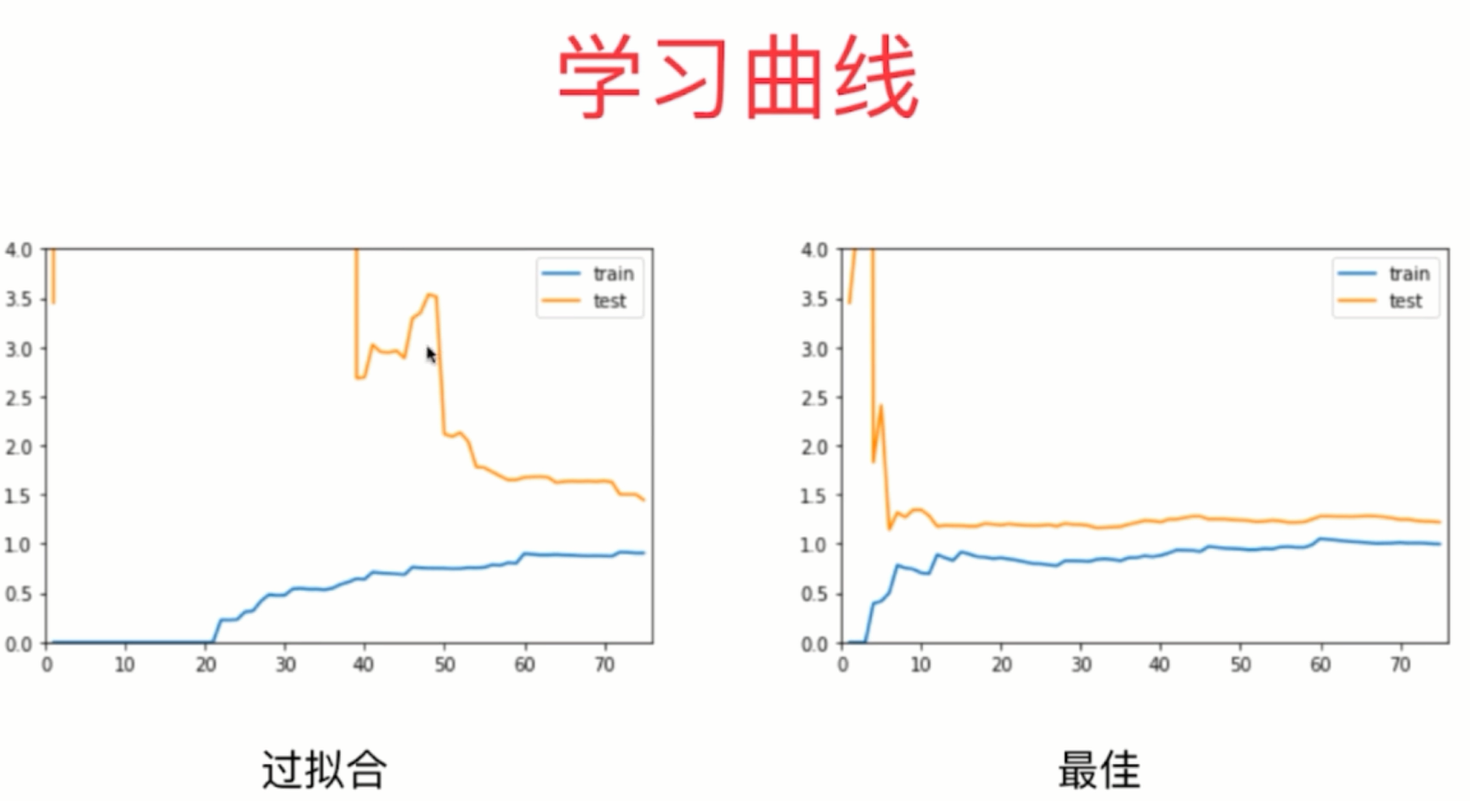

## 训练集  交叉验证集  测试集

为防止模型对测试集过拟合，加入验证集

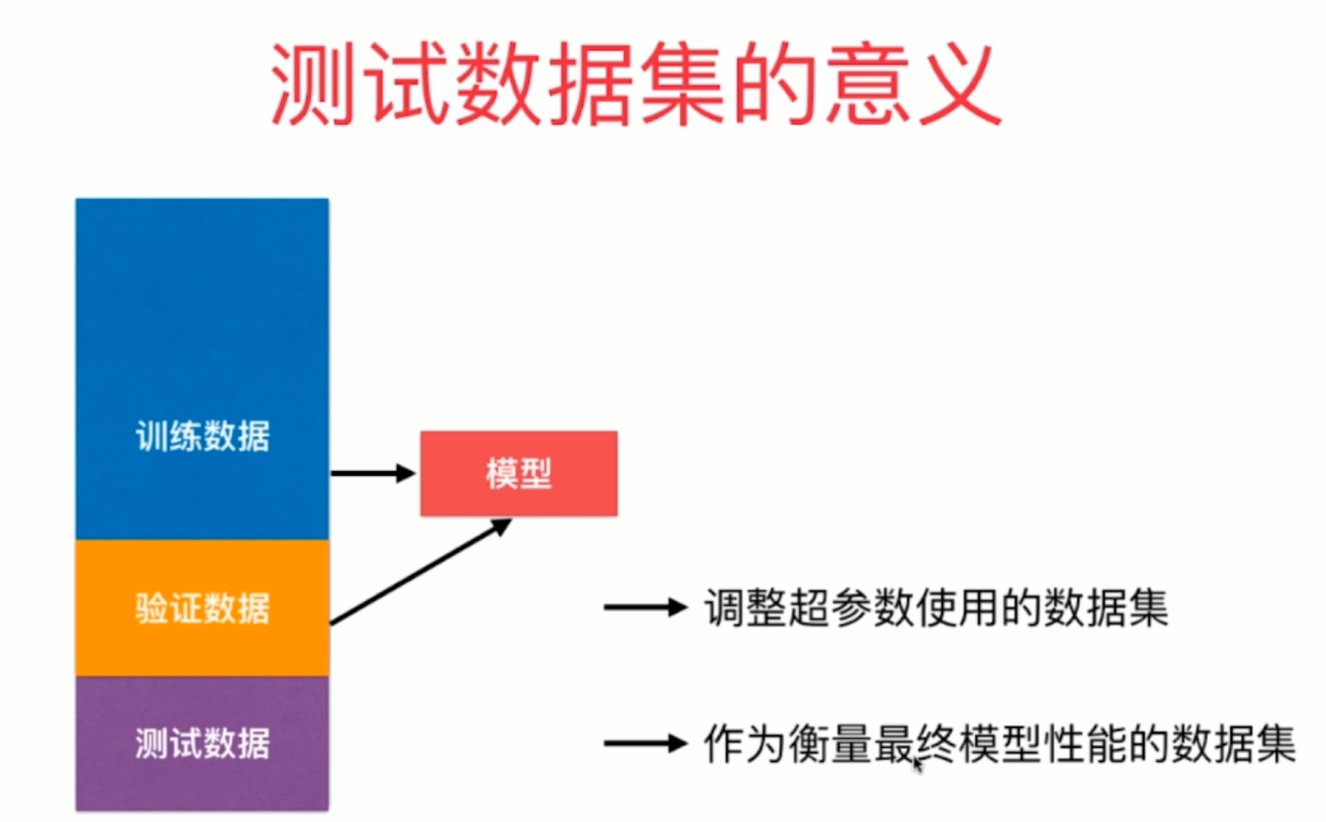

为防止验证集中含有极端数据，导致模型不准确，改为交叉验证集

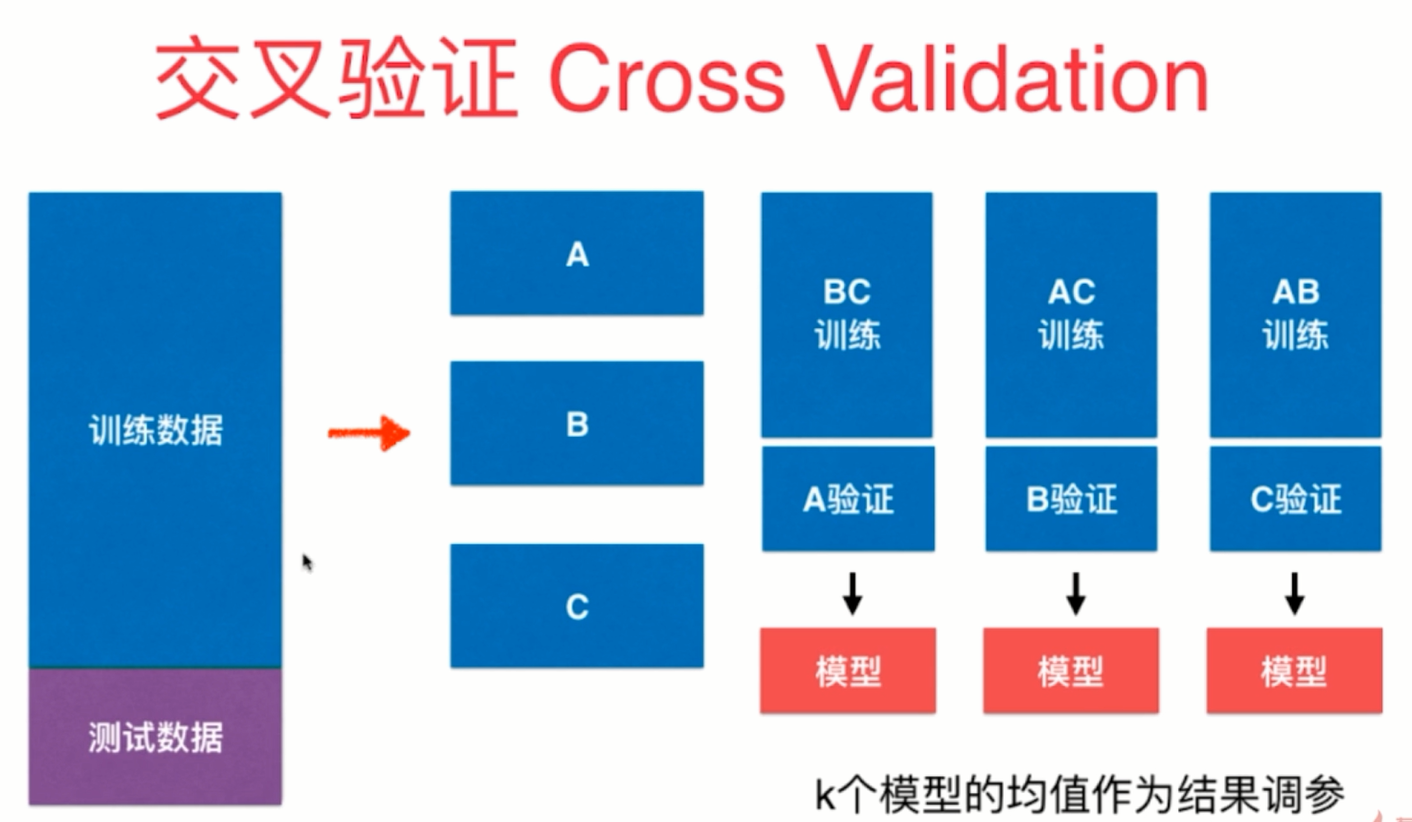

**之前使用的网格搜索，其内在原理用的就是交叉验证**

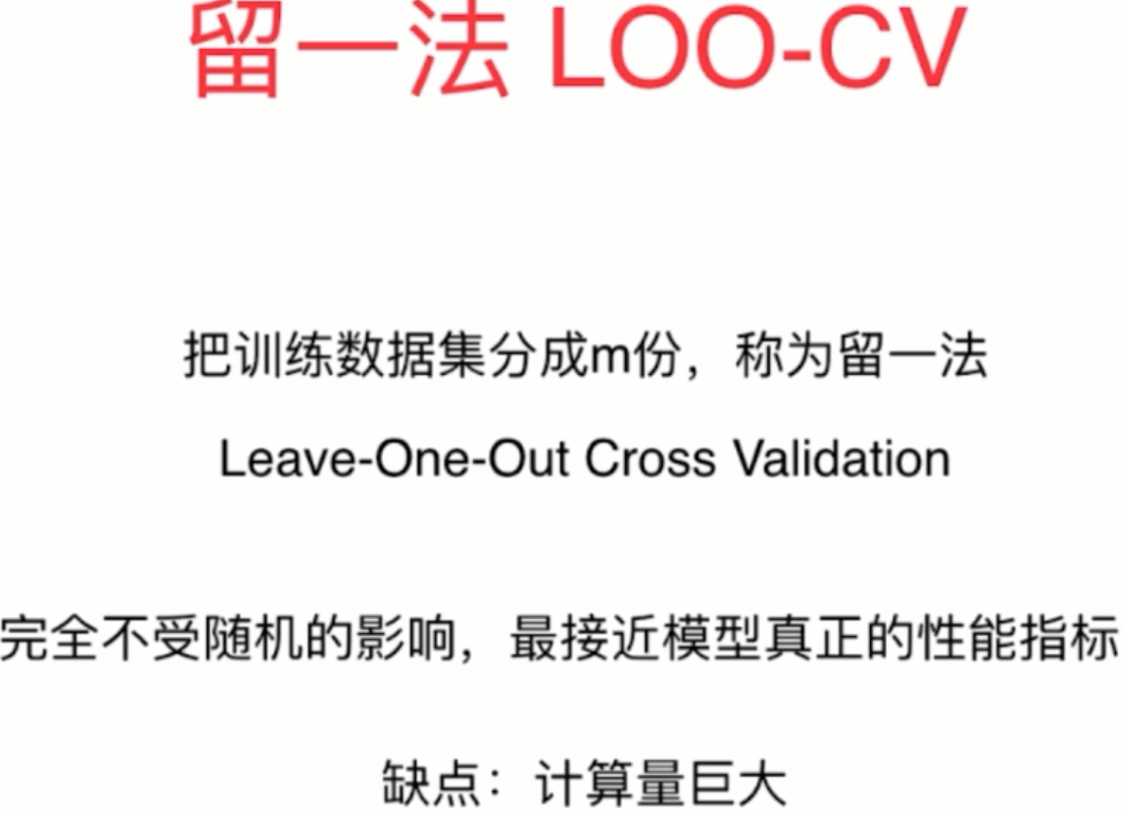

## 偏差（Bias）&方差（Variance）

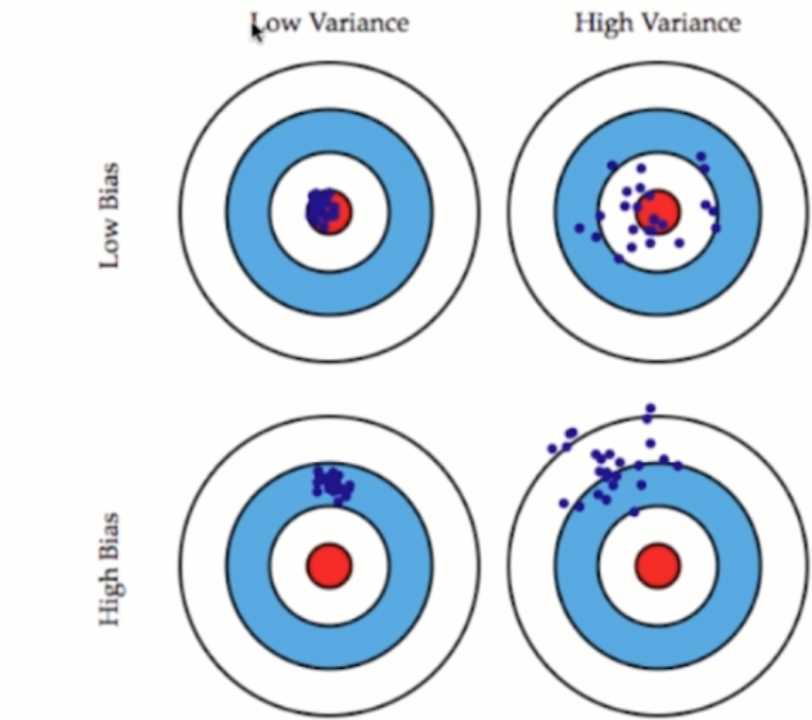

模型误差 == 偏差 + 方差 + 不可避免误差

偏差

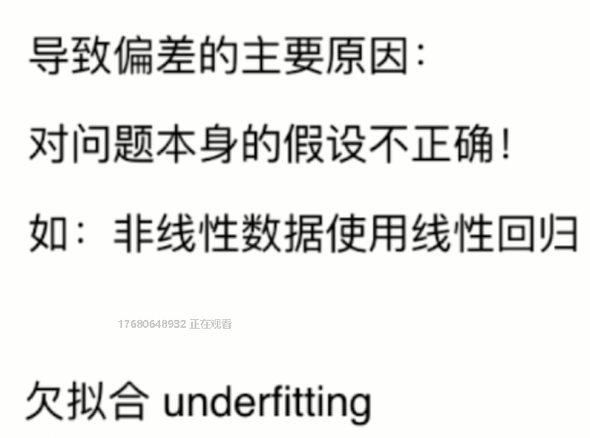

方差

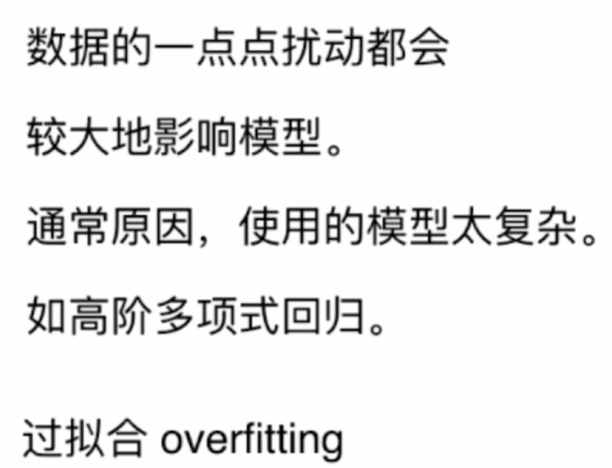

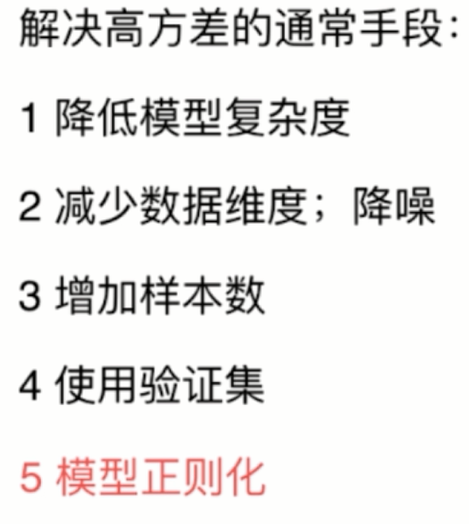

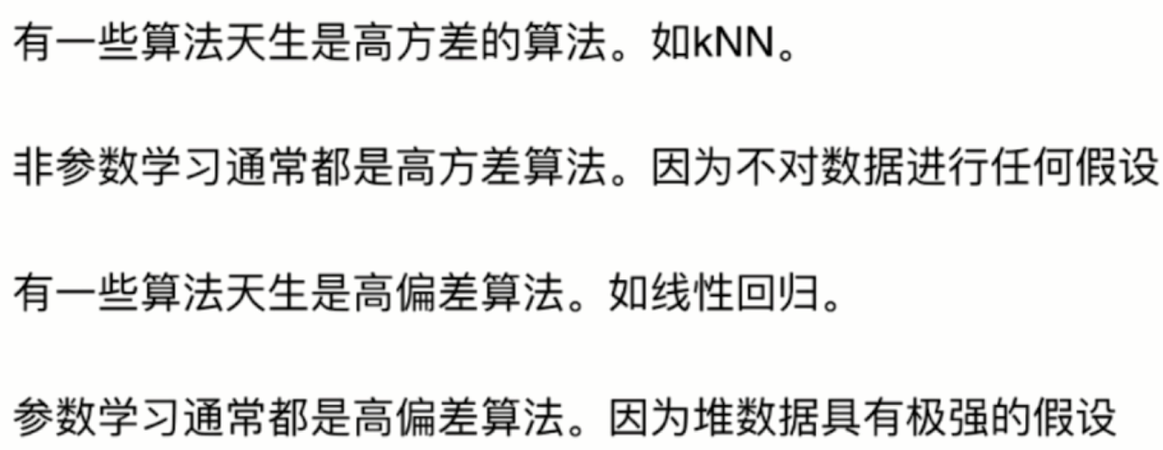

## 模型正则化

### 1.岭回归

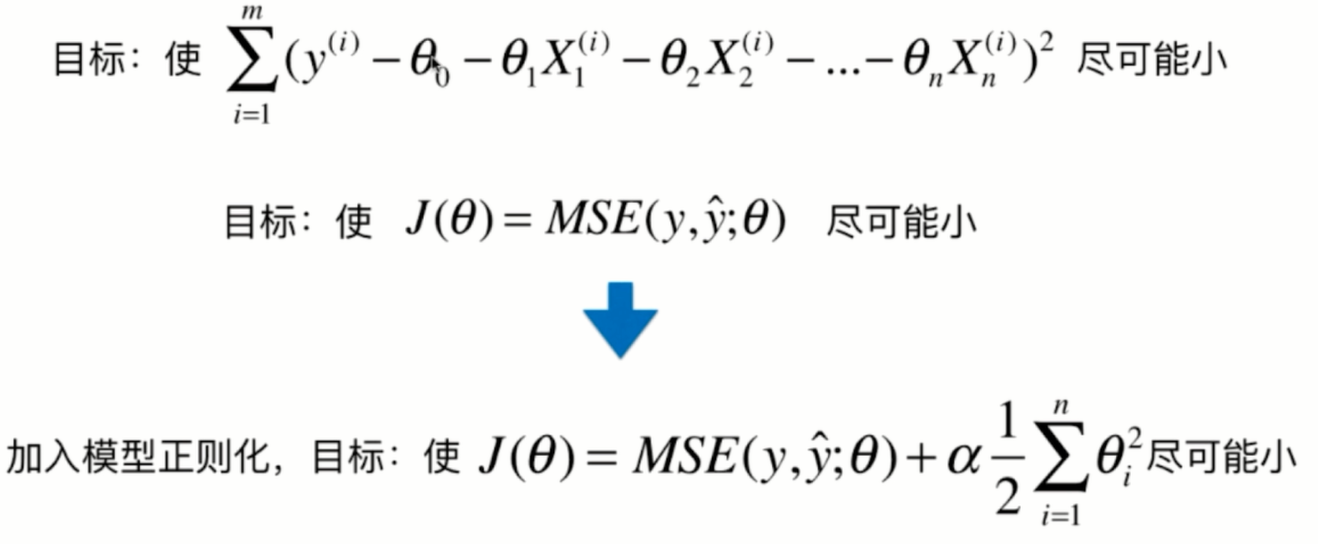

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
np.random.seed = 666
x = np.random.uniform(-3.0 , 3.0 , size = 100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size = 100)

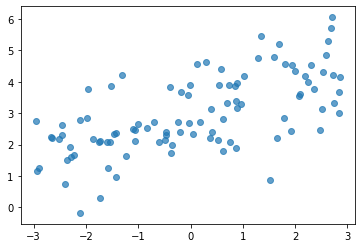

In [62]:
plt.scatter(X,y,alpha=0.7)
plt.show()

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [64]:
def plot_model(model):
    x_plot = np.linspace(-3 , 3 ,100).reshape(100,1)
    y_plot = model.predict(x_plot)
    
    plt.scatter(x , y)
    plt.plot(x_plot[:,0] , y_plot , color='r')
    plt.axis([-3,3,0,6])
    plt.show()

In [65]:
def RidgeRegression(degree , alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", Ridge(alpha = alpha))
    ])
    

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X ,  y)

#### 创建50次幂，不带正则项

In [67]:
ridge1 = RidgeRegression(50 , 0)

In [68]:
ridge1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=50, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [69]:
y_pre = ridge1.predict(X_test)
mean_squared_error(y_test , y_pre)

57430204.75863333

可见均方误差很大

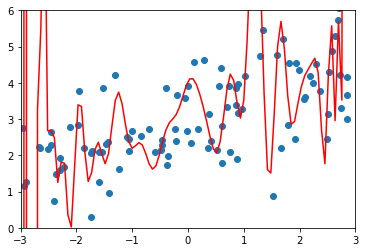

In [70]:
plot_model(ridge1)

#### 带正则项

In [71]:
ridge2 = RidgeRegression(50 , 0.0001)

In [72]:
ridge2.fit(X_train,y_train)
y_pre2 = ridge2.predict(X_test)
mean_squared_error(y_test , y_pre2)

1.5201328876874798

明显可见均方误差大大减小，曲线也平缓了很多

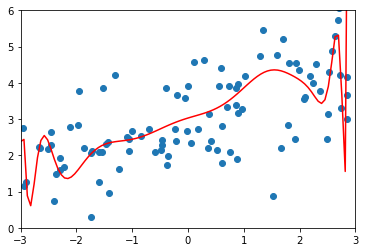

In [73]:
plot_model(ridge2)

继续加大惩罚系数

In [74]:
ridge3 = RidgeRegression(50 , 10)

In [75]:
ridge3.fit(X_train,y_train)
y_pre3 = ridge3.predict(X_test)
mean_squared_error(y_test , y_pre3)

1.1935037480751467

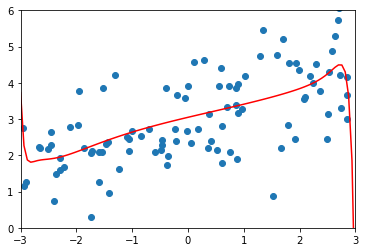

In [76]:
plot_model(ridge3)

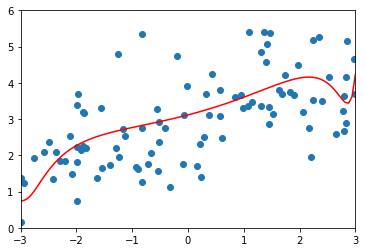

继续加大

In [77]:
ridge4 = RidgeRegression(50 , 10000000)

In [78]:
ridge4.fit(X_train,y_train)
y_pre4 = ridge4.predict(X_test)
mean_squared_error(y_test , y_pre4)

1.5511681938906383

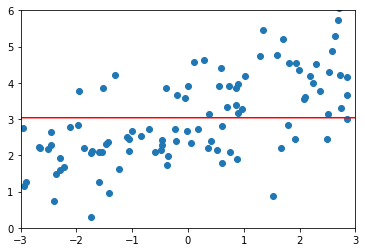

In [79]:
plot_model(ridge4)

### 2.LASSO 回归

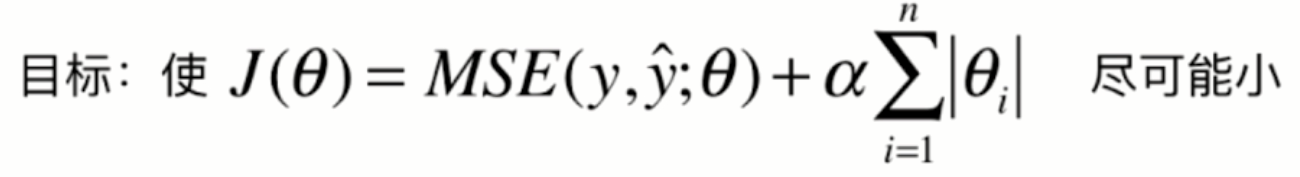

In [91]:
np.random.seed = 666
x = np.random.uniform(-3.0 , 3.0 , size = 100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size = 100)

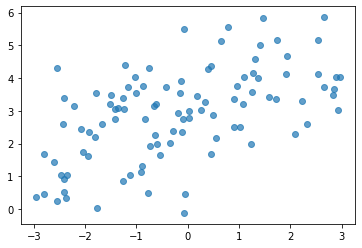

In [92]:
plt.scatter(X,y,alpha=0.7)
plt.show()

In [93]:
from sklearn.linear_model import Lasso

In [94]:
def LassoRegression(degree , alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", Lasso(alpha = alpha))
    ])
    

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X ,  y)

In [110]:
lasso_reg = LassoRegression(20 , 0)

In [111]:
lasso_reg.fit(X_train , y_train)

C:\Users\hyh\anaconda3\lib\site-packages\sklearn\pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\hyh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\hyh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.67228225615156, tolerance: 0.013140442999475364
  positive)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.0001,
                       warm_start=False))],
         verbose=False)

In [112]:
y_pre = lasso_reg.predict(X_test)
mean_squared_error(y_test , y_pre)

4.8117358530179475

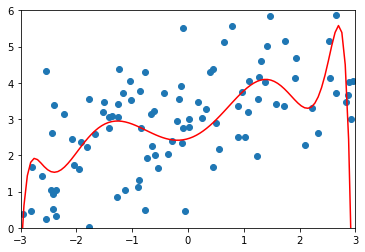

In [113]:
plot_model(lasso_reg)

**加大α**

In [114]:
lasso_reg = LassoRegression(20 , 0.1)
lasso_reg.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [115]:
y_pre = lasso_reg.predict(X_test)
mean_squared_error(y_test , y_pre)

1.5653500261924342

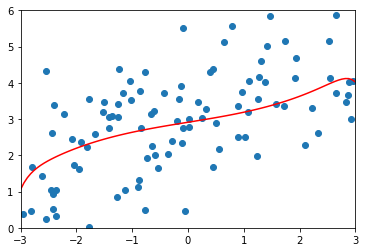

In [116]:
plot_model(lasso_reg)

In [117]:
lasso_reg = LassoRegression(20 , 1)
lasso_reg.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.0001,
                       warm_start=False))],
         verbose=False)

In [118]:
y_pre = lasso_reg.predict(X_test)
mean_squared_error(y_test , y_pre)

2.400143109658607

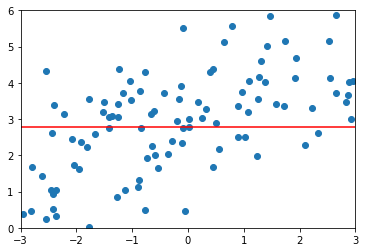

In [119]:
plot_model(lasso_reg)

## 比较Ridge 和 Lasso

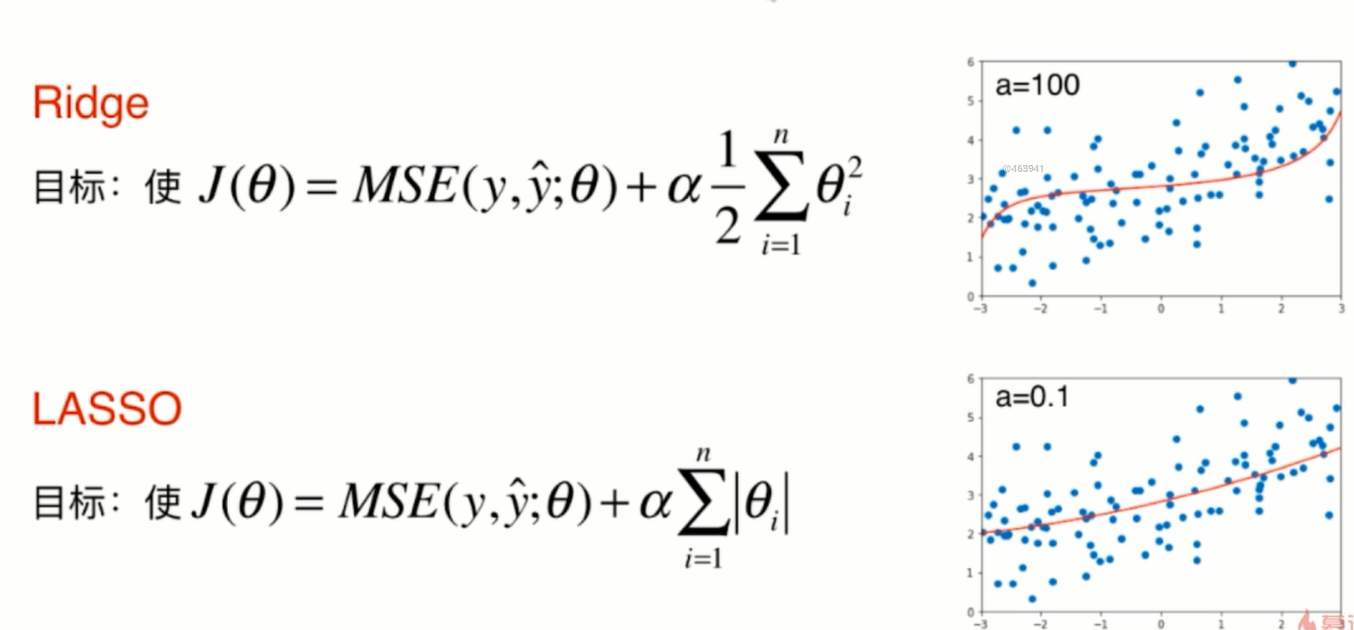  </img>

**Ridge**

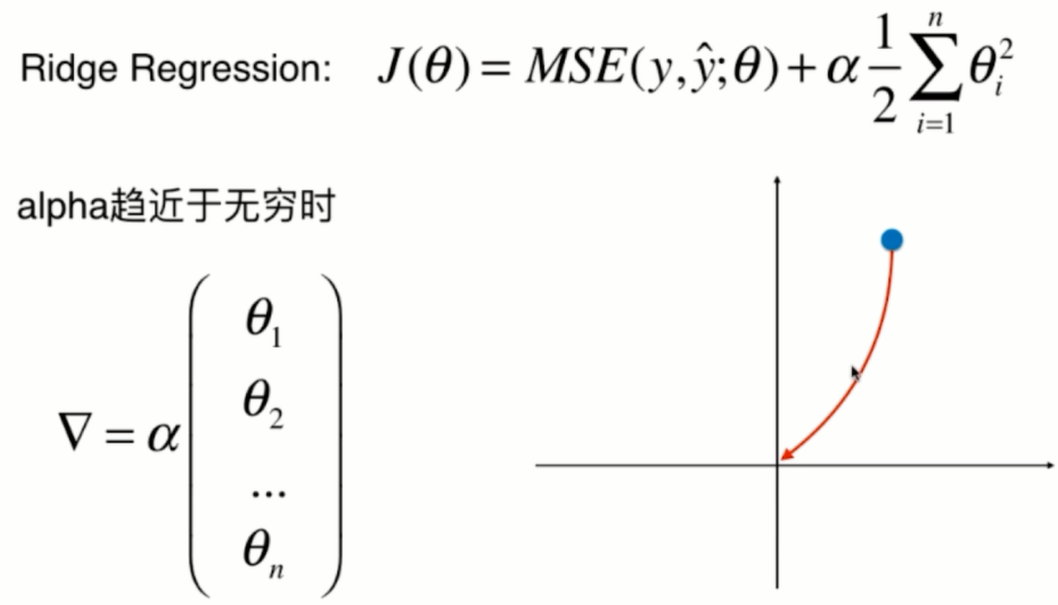  </img>

**Lasso**

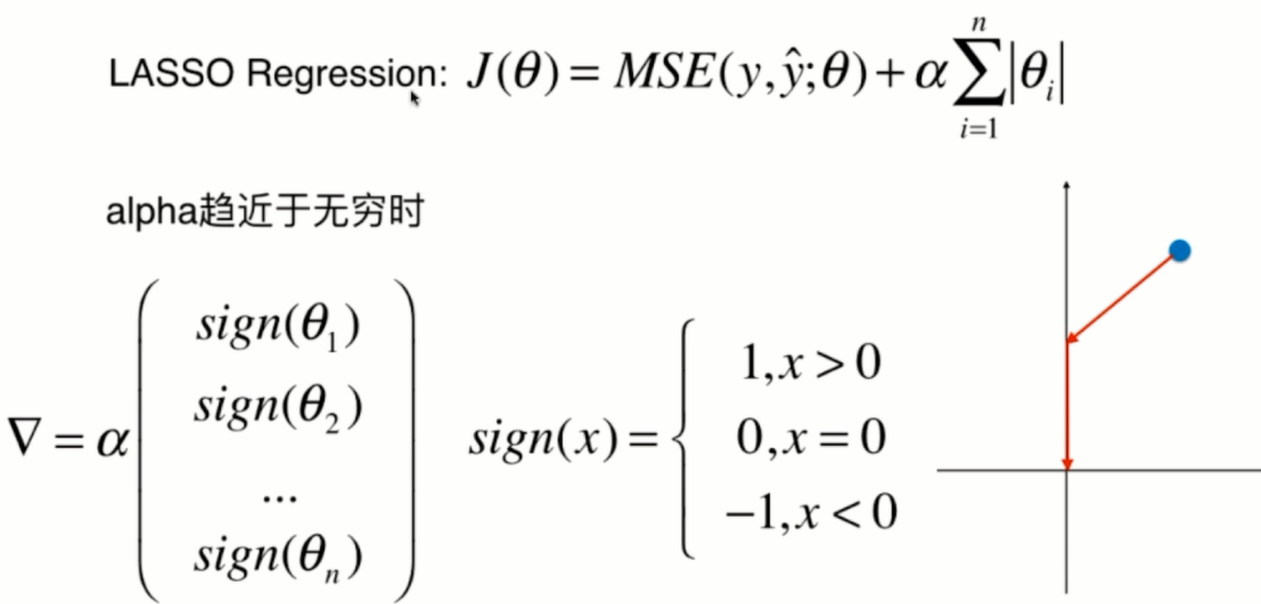  </img>

**Lasso 趋向于使得某些特征的θ值为0，所以可以用做特征选择，将一些不重要的特排除，但也有可能由于数据的扰动，将主要的特征移除**

## L1正则 , L2正则 ， 弹性网

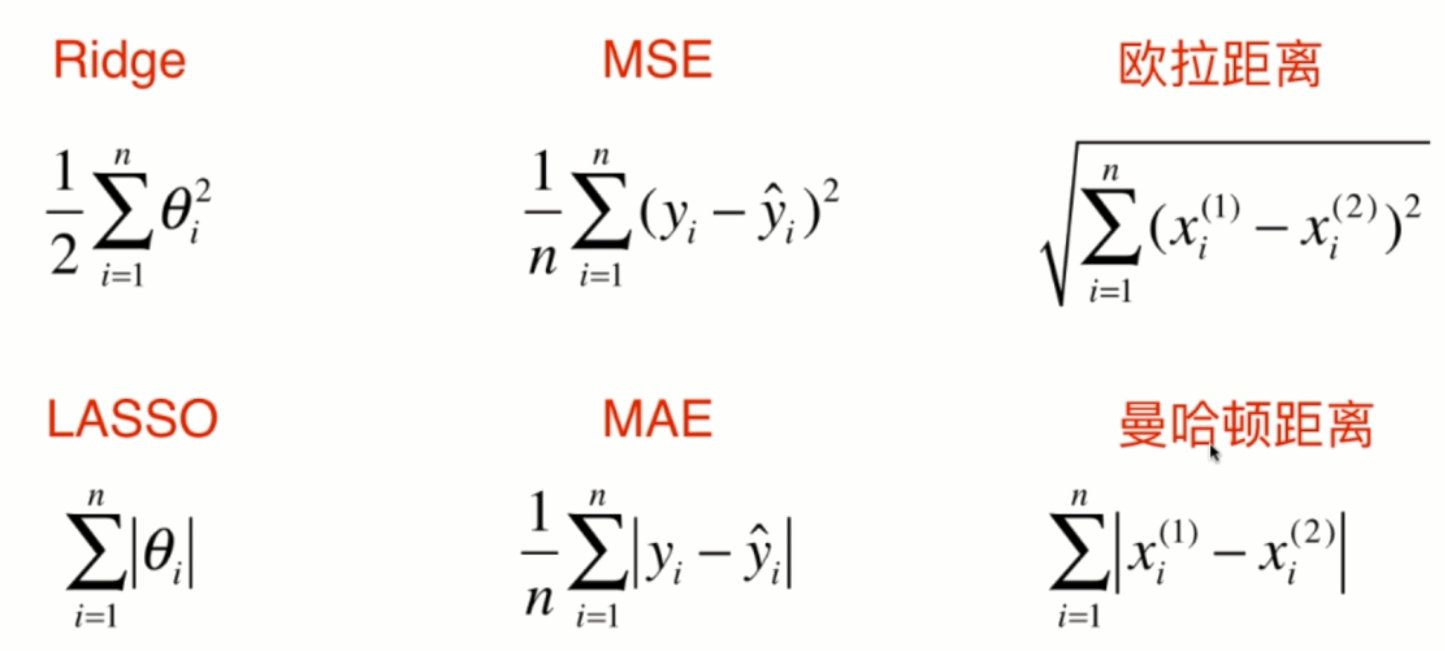  </img>

可以看到，其实这些都有很强的相关性

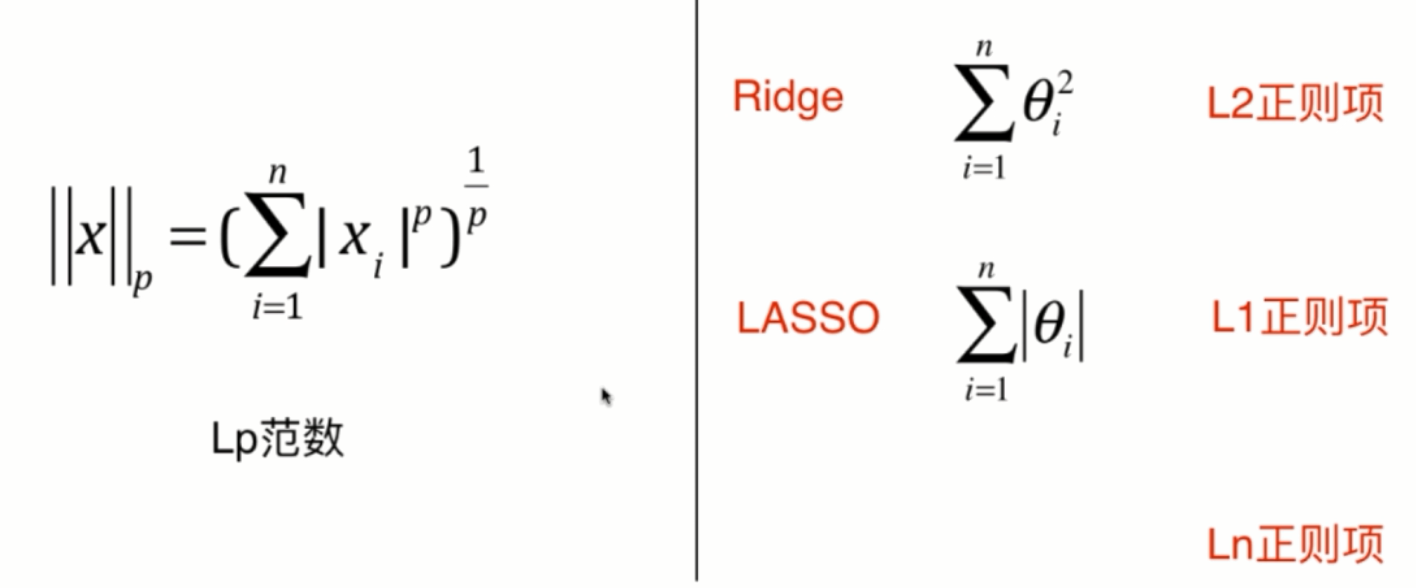  </img>

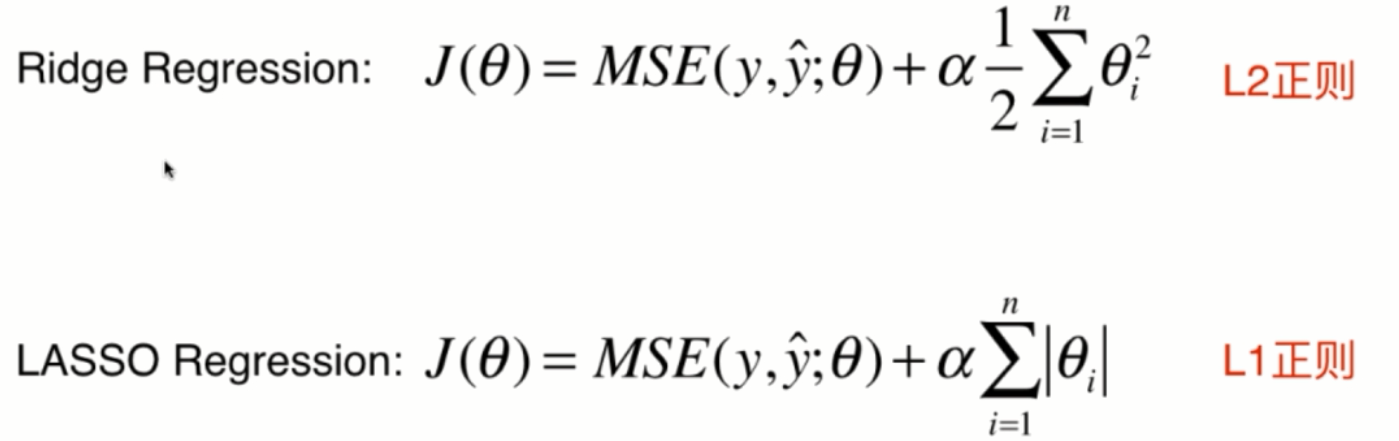  </img>

### 弹性网

结合Ridge 和 Lasso 回归 ， 引入一个新的超参数r

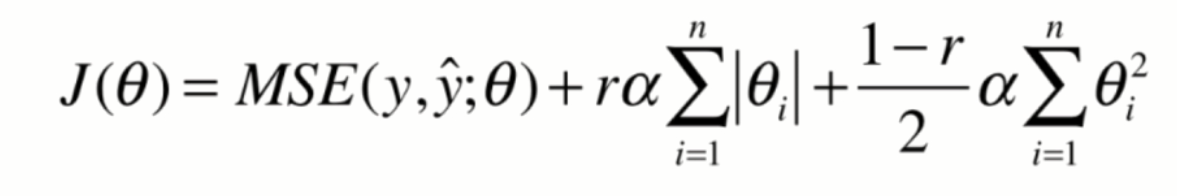  </img>

In [133]:
from sklearn.linear_model import ElasticNetCV

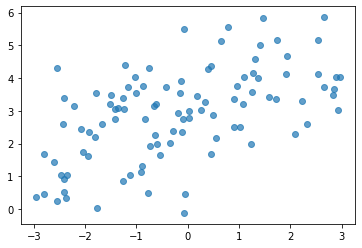

In [134]:
plt.scatter(X,y,alpha=0.7)
plt.show()

In [137]:
elastic_reg = ElasticNetCV()

In [138]:
elastic_reg.fit(X_train , y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.7, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [139]:
y_pre = elastic_reg.predict(X_test)
mean_squared_error(y_test , y_pre)

1.4861835068206184

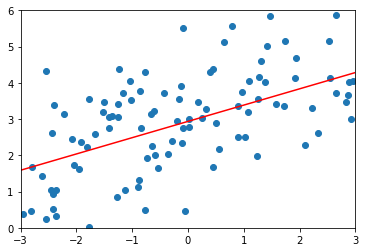

In [140]:
plot_model(elastic_reg)